In [1]:
from sympy import *
# Use pretty printing for SymPy `expr`essions
init_printing()

def noop(*args, **kwargs):
    pass
if __name__ != '__main__':
    display = noop

# Linear ODEs: example with complex eigenvalues

In this lecture we solve the linear ODE $\dot x=Ax$, where $A=\begin{bmatrix}6&-5\\13&-10\end{bmatrix}$.
I will solve this ODE manually verifying each step using [Python] library [SymPy].

[Python]: https://www.python.org "Python programming language"
[SymPy]: https://www.sympy.org "Symboic math in Python"

## Eigenvalues and eigenvectors

The eigenvalues of this matrix are $-2\pm i$, and the corresponding eigenvectors are $\begin{pmatrix}8\pm i\\13\end{pmatrix}$.

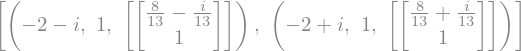

In [2]:
A = Matrix(2, 2, [6, -5, 13, -10])
A.eigenvects()

## Normal form
Therefore, $A = PCP^{-1}$, where $P=\begin{bmatrix}8&-1\\13&0\end{bmatrix}$, $C=\begin{bmatrix}-2&-1\\1&-2\end{bmatrix}$. In general, if $v=\begin{bmatrix}v_1\\v_2\end{bmatrix}$ is an eigenvector of $A$ with eigenvalue $λ$, then $C=\begin{bmatrix}\Re\lambda&-\Im\lambda\\\Im\lambda&\Re\lambda\end{bmatrix}$, $P=\begin{bmatrix}\Re v_1&-\Im v_1\\\Re v_2&-\Im v_2\end{bmatrix}$.

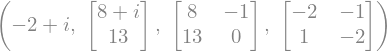

In [3]:
(λ, m, (v,)) = A.eigenvects()[1]
v *= 13 # get rid of the denominator; it's still an eigenvector
assert (A * v).expand() == (λ * v).expand()
P = re(v).row_join(-im(v))
C = Matrix(2, 2, [re(λ), -im(λ), im(λ), re(λ)])
assert P * C * P ** -1 == A
λ, v, P, C

## Formula for the solution

### Solution of the normalized equation
Recall that the solution of $\dot y=\begin{pmatrix}a&-b\\b&a\end{pmatrix}y$, $y(0)=c$, is given by $y(t)=e^{at}\begin{pmatrix}\cos(bt) & -\sin(bt)\\\sin(bt) & \cos(bt)\end{pmatrix}c$, hence solutions of $\dot y=Cy$ are given by $y(t)=e^{-2t}\begin{pmatrix}\cos t&-\sin t\\\sin t&\cos t\end{pmatrix}y(0)$.

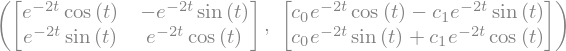

In [4]:
var('c0 c1') # Coordinates of $x(0)$
var('t') # Time
c = Matrix([c0, c1])
M = exp(re(λ) * t) * Matrix(2, 2, [cos(im(λ) * t), -sin(im(λ) * t), sin(im(λ) * t), cos(im(λ) * t)])
y = M * c
assert y.diff(t) == (C * y).expand()
M, y

### Solution of the original equation
Solutions of $\dot x=Ax$, $x(0)=c$, are given by 
$$
x(t)=PM(t)P^{-1}c=e^{-2t}\begin{bmatrix}8\sin t+\cos t&-5\sin t\\13\sin t&\cos t-8\sin t\end{bmatrix}x(0).
$$

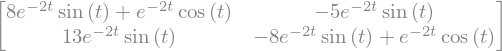

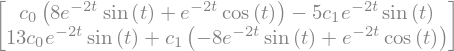

In [5]:
x = P * M * P ** -1 * c
assert x.diff(t).expand() == (A * x).expand()
assert x.subs(t, 0) == c
display(P * M * P ** -1, x)